In [15]:
import pandas as pd
from utils.visualization_tb import pie_hours
from utils.folders_tb import csv_df
from utils.mining_data_tb import delete_str_columnn
from utils.mining_data_tb import datetime_sorted_index
from utils.mining_data_tb import delete_rows_dateindex
from utils.folders_tb import jsonlink_df
from utils.mining_data_tb import object_int
from utils.visualization_tb import basic_graph_seaborn
from utils.new_dataframes import dateindex_calendarindex
from utils.visualization_tb import plot_graph
from utils.mining_data_tb import delete_rows
from utils.visualization_tb import plot_subplots
from utils.visualization_tb import merc
from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import get_provider, Vendors
from utils.visualization_tb import gen_map
from utils.visualization_tb import piebar_graph

In [49]:
hours_pie = pd.DataFrame({'steps' : ['Choose database to analyse', 'Clean up the database', 'Demonstrate narco-crime in Chicago risen since 2016', 'Analyse narco-crime per year in same graphic', 'Why did drug crime in Chicago drop in 2016?', 'interactive focus-map of narco-crime in Chicago', 'How has narco-crime evolved according to the most common locations?', 'How has narco-crime evolved according to the type of crime?'], 'hours' : [5, 16, 6, 10, 2, 30, 25, 10]})
hours_pie

,steps,hours
0,Choose database to analyse,5
1,Clean up the database,16
2,Demonstrate narco-crime in Chicago risen since...,6
3,Analyse narco-crime per year in same graphic,10
4,Why did drug crime in Chicago drop in 2016?,2
5,interactive focus-map of narco-crime in Chicago,30
6,How has narco-crime evolved according to the m...,25
7,How has narco-crime evolved according to the t...,10


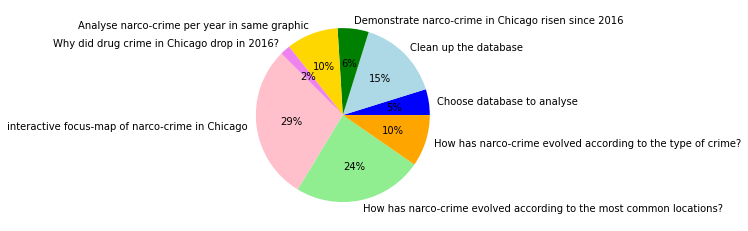

In [47]:
pie_hours(df_name=hours_pie['hours'], labels_df=hours_pie['steps'])

In [18]:
narco_uno = csv_df(csv_name='chicago_narcotics_2016_2020.csv')
narco_uno

,case_number,date,iucr,description,location_description,arrest,domestic,district,ward,community_area
0,JC341682,2019-07-09 17:23:00 UTC,2092,SOLICIT NARCOTICS ON PUBLICWAY,SIDEWALK,True,False,9,3.0,37
1,HZ337479,2016-07-05 23:00:00 UTC,2093,FOUND SUSPECT NARCOTICS,STREET,True,False,2,3.0,37
2,JA352545,2017-07-18 01:04:00 UTC,2022,POSS: COCAINE,STREET,True,False,9,12.0,59
3,JA420415,2017-09-05 23:10:00 UTC,1822,MANU/DEL:CANNABIS OVER 10 GMS,CHA PARKING LOT/GROUNDS,True,False,5,9.0,54
4,JB176183,2018-03-06 17:57:00 UTC,2022,POSS: COCAINE,SIDEWALK,True,False,16,41.0,10
...,...,...,...,...,...,...,...,...,...,...
57110,JA346193,2017-07-13 11:14:00 UTC,1811,POSS: CANNABIS 30GMS OR LESS,PARK PROPERTY,True,False,24,48.0,77
57111,HZ536909,2016-12-02 10:01:00 UTC,1811,POSS: CANNABIS 30GMS OR LESS,"SCHOOL, PRIVATE, BUILDING",True,False,20,48.0,77
57112,HZ143918,2016-02-07 19:44:00 UTC,1811,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,20,40.0,77
57113,JA374418,2017-08-02 15:39:00 UTC,2024,POSS: HEROIN(WHITE),STREET,True,False,20,48.0,77


In [19]:
chicago_iucr = jsonlink_df(url_json='https://data.cityofchicago.org/resource/c7ck-438e.json')
chicago_iucr

,iucr,primary_description,secondary_description,index_code
0,110,HOMICIDE,FIRST DEGREE MURDER,I
1,130,HOMICIDE,SECOND DEGREE MURDER,I
2,141,HOMICIDE,INVOLUNTARY MANSLAUGHTER,N
3,142,HOMICIDE,RECKLESS HOMICIDE,N
4,261,CRIM SEXUAL ASSAULT,AGGRAVATED: HANDGUN,I
...,...,...,...,...
396,5121,OTHER OFFENSE,ARSONIST: ANNUAL REGISTRATION,N
397,5122,OTHER OFFENSE,ARSONIST: FAIL TO REGISTER NEW ADDRESS,N
398,5130,OTHER OFFENSE,VIOLENT OFFENDER: DUTY TO REGISTER,N
399,5131,OTHER OFFENSE,VIOLENT OFFENDER: ANNUAL REGISTRATION,N


In [20]:
chicago_iucr = chicago_iucr.loc[chicago_iucr['primary_description'] == 'NARCOTICS']
chicago_iucr = chicago_iucr.loc[:, ['iucr', 'secondary_description']]
chicago_iucr.head()

,iucr,secondary_description
264,1811,POSS: CANNABIS 30GMS OR LESS
265,1812,POSS: CANNABIS MORE THAN 30GMS
266,1821,MANU/DEL:CANNABIS 10GM OR LESS
267,1822,MANU/DEL:CANNABIS OVER 10 GMS
268,1840,DELIVER CANNABIS TO PERSON <18


In [21]:
object_int(df_name=chicago_iucr, column_df='iucr')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 264 to 312
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   iucr                   48 non-null     object
 1   secondary_description  48 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB
-----

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 264 to 312
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   iucr                   48 non-null     int32 
 1   secondary_description  48 non-null     object
dtypes: int32(1), object(1)
memory usage: 960.0+ bytes


In [22]:
narco_uno = narco_uno.merge(chicago_iucr, left_on=['iucr'], right_on=['iucr'], how='left')
del narco_uno['description']
narco_uno

,case_number,date,iucr,location_description,arrest,domestic,district,ward,community_area,secondary_description
0,JC341682,2019-07-09 17:23:00 UTC,2092,SIDEWALK,True,False,9,3.0,37,SOLICIT NARCOTICS ON PUBLICWAY
1,HZ337479,2016-07-05 23:00:00 UTC,2093,STREET,True,False,2,3.0,37,FOUND SUSPECT NARCOTICS
2,JA352545,2017-07-18 01:04:00 UTC,2022,STREET,True,False,9,12.0,59,POSS: COCAINE
3,JA420415,2017-09-05 23:10:00 UTC,1822,CHA PARKING LOT/GROUNDS,True,False,5,9.0,54,MANU/DEL:CANNABIS OVER 10 GMS
4,JB176183,2018-03-06 17:57:00 UTC,2022,SIDEWALK,True,False,16,41.0,10,POSS: COCAINE
...,...,...,...,...,...,...,...,...,...,...
57110,JA346193,2017-07-13 11:14:00 UTC,1811,PARK PROPERTY,True,False,24,48.0,77,POSS: CANNABIS 30GMS OR LESS
57111,HZ536909,2016-12-02 10:01:00 UTC,1811,"SCHOOL, PRIVATE, BUILDING",True,False,20,48.0,77,POSS: CANNABIS 30GMS OR LESS
57112,HZ143918,2016-02-07 19:44:00 UTC,1811,STREET,True,False,20,40.0,77,POSS: CANNABIS 30GMS OR LESS
57113,JA374418,2017-08-02 15:39:00 UTC,2024,STREET,True,False,20,48.0,77,POSS: HEROIN(WHITE)


In [23]:
delete_str_columnn(df_name=narco_uno, column_df='date', a=0, b=-13)

,case_number,date,iucr,location_description,arrest,domestic,district,ward,community_area,secondary_description
0,JC341682,2019-07-09,2092,SIDEWALK,True,False,9,3.0,37,SOLICIT NARCOTICS ON PUBLICWAY
1,HZ337479,2016-07-05,2093,STREET,True,False,2,3.0,37,FOUND SUSPECT NARCOTICS
2,JA352545,2017-07-18,2022,STREET,True,False,9,12.0,59,POSS: COCAINE
3,JA420415,2017-09-05,1822,CHA PARKING LOT/GROUNDS,True,False,5,9.0,54,MANU/DEL:CANNABIS OVER 10 GMS
4,JB176183,2018-03-06,2022,SIDEWALK,True,False,16,41.0,10,POSS: COCAINE
...,...,...,...,...,...,...,...,...,...,...
57110,JA346193,2017-07-13,1811,PARK PROPERTY,True,False,24,48.0,77,POSS: CANNABIS 30GMS OR LESS
57111,HZ536909,2016-12-02,1811,"SCHOOL, PRIVATE, BUILDING",True,False,20,48.0,77,POSS: CANNABIS 30GMS OR LESS
57112,HZ143918,2016-02-07,1811,STREET,True,False,20,40.0,77,POSS: CANNABIS 30GMS OR LESS
57113,JA374418,2017-08-02,2024,STREET,True,False,20,48.0,77,POSS: HEROIN(WHITE)


In [24]:
narco = datetime_sorted_index(df_name=narco_uno)
narco

,case_number,iucr,location_description,arrest,domestic,district,ward,community_area,secondary_description
date,,,,,,,,,
2016-01-01,HZ100833,2093,RESIDENCE,True,False,5,34.0,53,FOUND SUSPECT NARCOTICS
2016-01-01,HZ101110,1811,STREET,True,False,8,16.0,66,POSS: CANNABIS 30GMS OR LESS
2016-01-01,HZ100931,1821,PARKING LOT/GARAGE(NON.RESID.),True,False,8,18.0,66,MANU/DEL:CANNABIS 10GM OR LESS
2016-01-01,HZ101122,1811,CTA STATION,True,False,5,21.0,49,POSS: CANNABIS 30GMS OR LESS
2016-01-01,HZ100451,2093,OTHER,True,False,19,46.0,3,FOUND SUSPECT NARCOTICS
...,...,...,...,...,...,...,...,...,...
2020-07-23,JD307654,2095,DRUG STORE,True,False,2,4.0,41,ATTEMPT POSSESSION NARCOTICS
2020-07-23,JD307137,1812,VEHICLE NON-COMMERCIAL,True,False,12,25.0,31,POSS: CANNABIS MORE THAN 30GMS
2020-07-23,JD307739,2027,SIDEWALK,True,False,11,28.0,29,POSS: CRACK


In [25]:
narco = delete_rows_dateindex(df_name=narco, todel_value=2020, y_m_d='y')
narco

,case_number,iucr,location_description,arrest,domestic,district,ward,community_area,secondary_description
date,,,,,,,,,
2016-01-01,HZ100833,2093,RESIDENCE,True,False,5,34.0,53,FOUND SUSPECT NARCOTICS
2016-01-01,HZ101110,1811,STREET,True,False,8,16.0,66,POSS: CANNABIS 30GMS OR LESS
2016-01-01,HZ100931,1821,PARKING LOT/GARAGE(NON.RESID.),True,False,8,18.0,66,MANU/DEL:CANNABIS 10GM OR LESS
2016-01-01,HZ101122,1811,CTA STATION,True,False,5,21.0,49,POSS: CANNABIS 30GMS OR LESS
2016-01-01,HZ100451,2093,OTHER,True,False,19,46.0,3,FOUND SUSPECT NARCOTICS
...,...,...,...,...,...,...,...,...,...
2019-12-31,JC566894,1822,STREET,True,False,3,8.0,43,MANU/DEL:CANNABIS OVER 10 GMS
2019-12-31,JC566993,2093,STREET,True,False,7,15.0,67,FOUND SUSPECT NARCOTICS
2019-12-31,JC566244,2017,SIDEWALK,True,False,11,28.0,26,MANU/DELIVER:CRACK


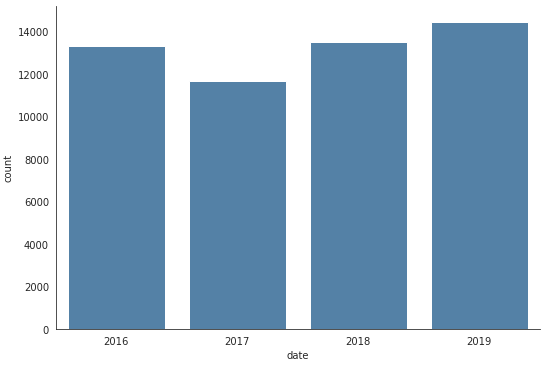

In [26]:
basic_graph_seaborn(x_axis=narco.index.year, df_name=narco, kind_graph="count", a=2016, b=2020)

In [27]:
narco['delitos'] = 1
narco_years = dateindex_calendarindex(df_name=narco, ymd_ym='ym')
narco_years.head()

iucr  arrest  domestic  district     ward  community_area  \
date date                                                                 
2016 Jan   2218673    1145         1     12309  25982.0           43362   
     Feb   2511624    1297         1     14999  30146.0           48541   
     Mar   2838907    1471         1     16233  33459.0           56670   
     Apr   2812561    1455         1     15657  32004.0           56477   
     May   2704485    1399         1     15793  32466.0           51841   

           delitos  
date date           
2016 Jan      1145  
     Feb      1300  
     Mar      1471  
     Apr      1455  
     May      1401

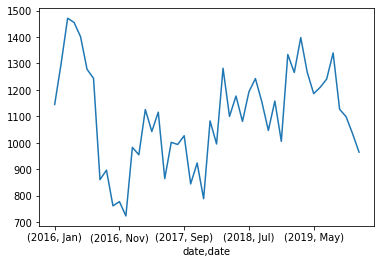

In [28]:
plot_graph(df_name=narco_years['delitos'])

In [29]:
narco = delete_rows(df_name=narco, column_df='secondary_description', value_todel='POSS: CANNABIS 30GMS OR LESS')  # # sean homogeneos, si no me desbirtua el analisis
narco

,case_number,iucr,location_description,arrest,domestic,district,ward,community_area,secondary_description,delitos
date,,,,,,,,,,
2016-01-01,HZ100833,2093,RESIDENCE,True,False,5,34.0,53,FOUND SUSPECT NARCOTICS,1
2016-01-01,HZ100931,1821,PARKING LOT/GARAGE(NON.RESID.),True,False,8,18.0,66,MANU/DEL:CANNABIS 10GM OR LESS,1
2016-01-01,HZ100451,2093,OTHER,True,False,19,46.0,3,FOUND SUSPECT NARCOTICS,1
2016-01-01,HZ101003,1821,VEHICLE NON-COMMERCIAL,True,False,7,20.0,68,MANU/DEL:CANNABIS 10GM OR LESS,1
2016-01-01,HZ100502,2018,CONVENIENCE STORE,True,False,11,24.0,27,MANU/DELIVER:SYNTHETIC DRUGS,1
...,...,...,...,...,...,...,...,...,...,...
2019-12-31,JC566894,1822,STREET,True,False,3,8.0,43,MANU/DEL:CANNABIS OVER 10 GMS,1
2019-12-31,JC566993,2093,STREET,True,False,7,15.0,67,FOUND SUSPECT NARCOTICS,1
2019-12-31,JC566244,2017,SIDEWALK,True,False,11,28.0,26,MANU/DELIVER:CRACK,1


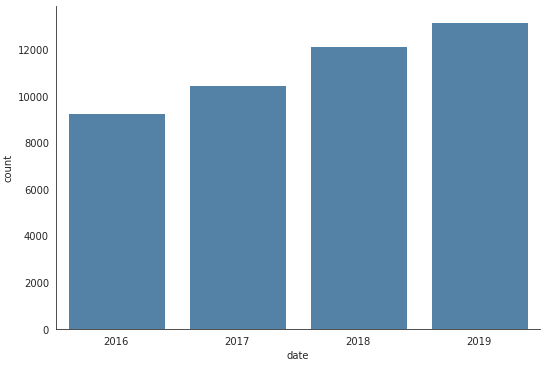

In [30]:
basic_graph_seaborn(x_axis=narco.index.year, df_name=narco, kind_graph="count", a=2016, b=2020)

In [31]:
narco_years = dateindex_calendarindex(df_name=narco, ymd_ym='ym')
narco_years.head()

iucr  arrest  domestic  district     ward  community_area  \
date date                                                                 
2016 Jan   1508761     753         0      8094  17282.0           28290   
     Feb   1629667     812         0      9364  19337.0           29615   
     Mar   1826558     912         0     10038  20823.0           34840   
     Apr   1823755     909         0      9893  20723.0           34984   
     May   1712057     851         0      9668  20400.0           30473   

           delitos  
date date           
2016 Jan       753  
     Feb       813  
     Mar       912  
     Apr       909  
     May       853

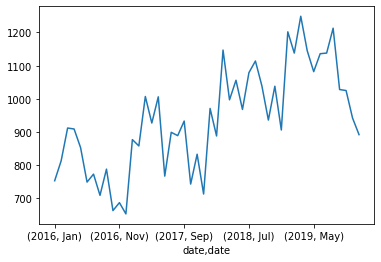

In [32]:
plot_graph(df_name=narco_years['delitos'])

In [33]:
narco_years_2 = narco_years.loc[2016, ['delitos']]
narco_years_2['2017'] = narco_years.loc[2017, ['delitos']]
narco_years_2['2018'] = narco_years.loc[2018, ['delitos']]
narco_years_2['2019'] = narco_years.loc[2019, ['delitos']]
narco_years_2.rename(columns={'delitos':'2016'}, inplace=True)
narco_years_2

,2016,2017,2018,2019
date,,,,
Jan,753,877,971,1202
Feb,813,858,888,1138
Mar,912,1007,1147,1249
Apr,909,927,997,1145
May,853,1006,1056,1082
Jun,749,767,968,1136
Jul,773,899,1079,1138
Aug,709,889,1114,1213
Sep,788,933,1039,1028


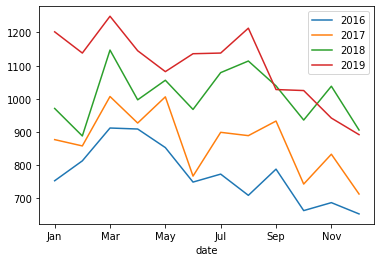

In [34]:
plot_graph(df_name=narco_years_2, col_sel=False)

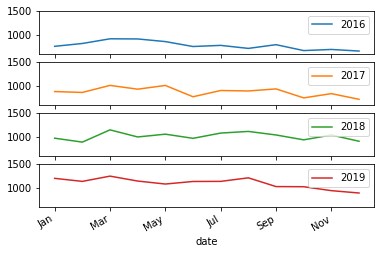

In [35]:
plot_subplots(df_name=narco_years_2, a=600, b=1500)

In [36]:
narco_map = narco.loc[:, ['district']]
narco_map

,district
date,
2016-01-01,5
2016-01-01,8
2016-01-01,19
2016-01-01,7
2016-01-01,11
...,...
2019-12-31,3
2019-12-31,7
2019-12-31,11


In [37]:
chicago = csv_df('Police_Stations.csv')
chicago = chicago.loc[1:, ['DISTRICT','LOCATION']]
chicago = chicago.rename({'DISTRICT':'district'}, axis=1)
chicago

,district,LOCATION
1,18,"(41.9032416531, -87.6433521393)"
2,19,"(41.9474004564, -87.651512018)"
3,20,"(41.9795495131, -87.6928445094)"
4,22,"(41.6914347795, -87.6685203937)"
5,24,"(41.9997634842, -87.6713242922)"
6,25,"(41.9186088912, -87.765574479)"
7,1,"(41.8583725929, -87.627356171)"
8,2,"(41.8018110912, -87.6305601801)"
9,3,"(41.7664308925, -87.6057478606)"
10,4,"(41.7079332906, -87.5683491228)"


In [38]:
object_int(df_name=chicago, column_df='district')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 1 to 22
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  22 non-null     object
 1   LOCATION  22 non-null     object
dtypes: object(2)
memory usage: 484.0+ bytes
-----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 1 to 22
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  22 non-null     int32 
 1   LOCATION  22 non-null     object
dtypes: int32(1), object(1)
memory usage: 396.0+ bytes


In [39]:
narco_map = narco_map.merge(chicago, left_on=['district'], right_on=['district'], how='left')
narco_map.head()

,district,LOCATION
0,5,"(41.6927233639, -87.6045058667)"
1,8,"(41.778987189, -87.7088638153)"
2,19,"(41.9474004564, -87.651512018)"
3,7,"(41.7796315359, -87.6608870173)"
4,11,"(41.8735822883, -87.705488126)"


In [40]:
narco_map['focus_size'] = 1
chicago_map = narco_map.groupby('LOCATION').sum().loc[:,['focus_size']]
chicago_map.reset_index(level=0, inplace=True)
chicago_map.head()

,LOCATION,focus_size
0,"(41.6914347795, -87.6685203937)",695
1,"(41.6927233639, -87.6045058667)",1644
2,"(41.7079332906, -87.5683491228)",1801
3,"(41.7521368378, -87.6442289066)",2577
4,"(41.7664308925, -87.6057478606)",1240


In [41]:
chicago_map['coords_x'] = chicago_map['LOCATION'].apply(lambda x: merc(x)[0])
chicago_map['coords_y'] = chicago_map['LOCATION'].apply(lambda x: merc(x)[1])
chicago_map['focus_size'] = chicago_map['focus_size'].apply(lambda x: x/100)
chicago_map.head()

,LOCATION,focus_size,coords_x,coords_y
0,"(41.6914347795, -87.6685203937)",6.95,-9.759215e+06,5.114869e+06
1,"(41.6927233639, -87.6045058667)",16.44,-9.752089e+06,5.115061e+06
2,"(41.7079332906, -87.5683491228)",18.01,-9.748064e+06,5.117329e+06
3,"(41.7521368378, -87.6442289066)",25.77,-9.756511e+06,5.123923e+06
4,"(41.7664308925, -87.6057478606)",12.40,-9.752227e+06,5.126056e+06


In [42]:
tile_provider = get_provider(Vendors.CARTODBPOSITRON)
chicago_map['focus_size'].loc[12] = 100
gen_map(df_name=chicago_map, tile_provider=tile_provider) 

Loading BokehJS ...

In [43]:
narco_crime = narco.loc[:, ['location_description', 'secondary_description']]
narco_crime = narco_crime.reset_index()
delete_str_columnn(df_name=narco_crime, column_df='date', b=-15)
narco_crime

,date,location_description,secondary_description
0,2016,RESIDENCE,FOUND SUSPECT NARCOTICS
1,2016,PARKING LOT/GARAGE(NON.RESID.),MANU/DEL:CANNABIS 10GM OR LESS
2,2016,OTHER,FOUND SUSPECT NARCOTICS
3,2016,VEHICLE NON-COMMERCIAL,MANU/DEL:CANNABIS 10GM OR LESS
4,2016,CONVENIENCE STORE,MANU/DELIVER:SYNTHETIC DRUGS
...,...,...,...
45038,2019,STREET,MANU/DEL:CANNABIS OVER 10 GMS
45039,2019,STREET,FOUND SUSPECT NARCOTICS
45040,2019,SIDEWALK,MANU/DELIVER:CRACK
45041,2019,STREET,POSS: HEROIN(WHITE)


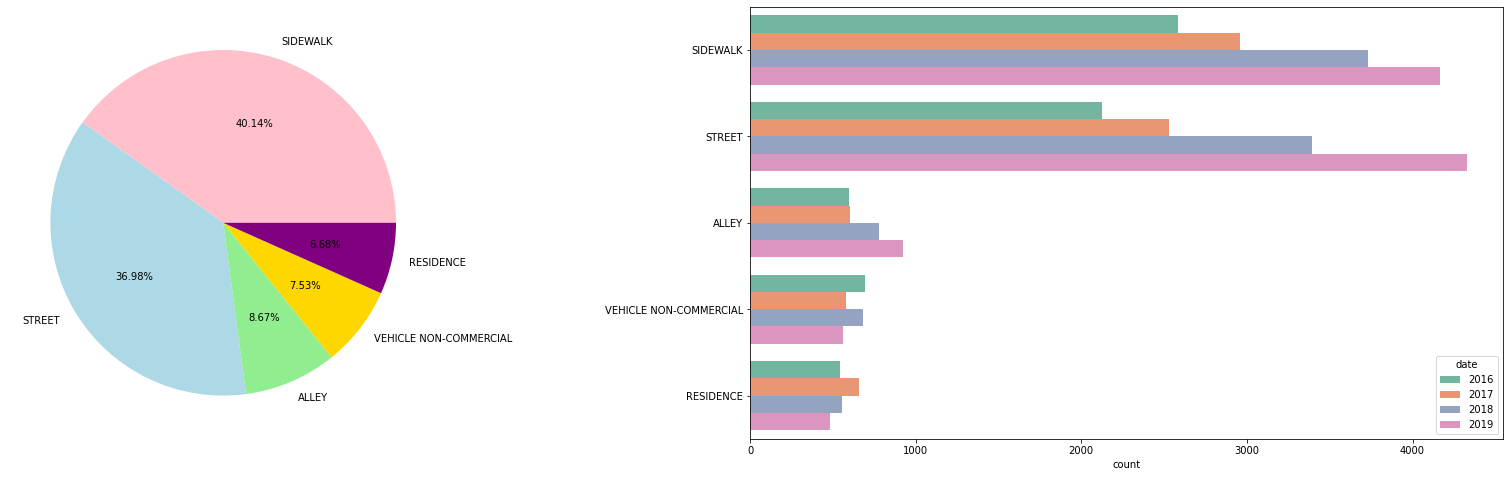

In [44]:
piebar_graph(df_name=narco_crime, column_df='location_description', hue_col='date', b=5)

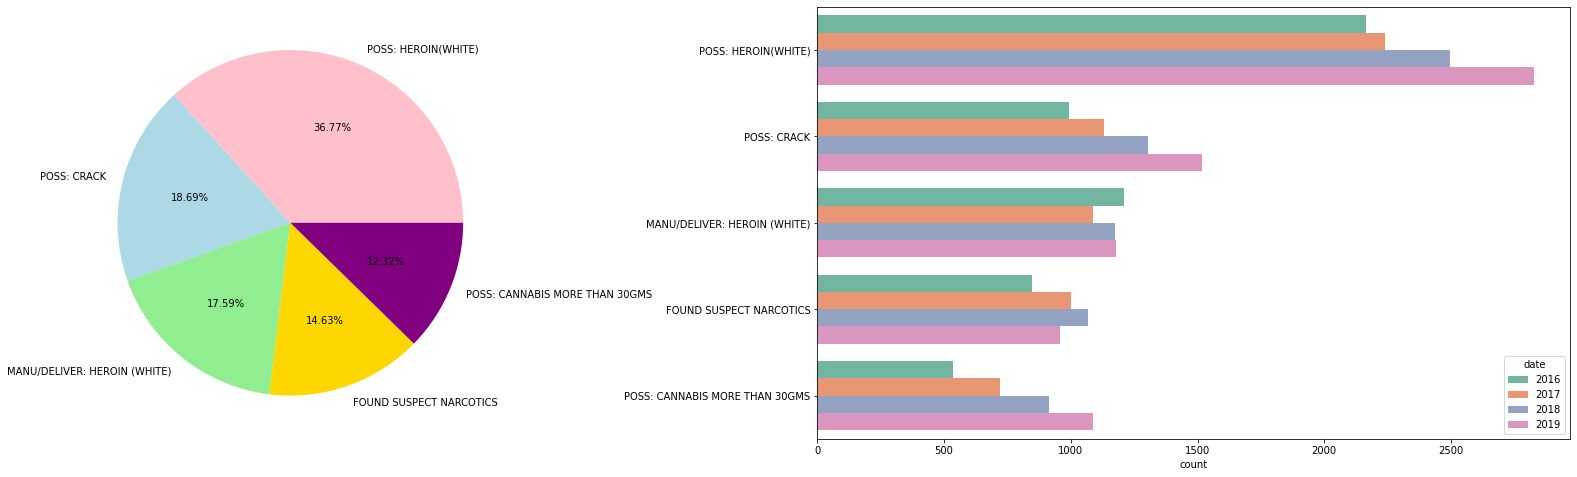

In [45]:
piebar_graph(df_name=narco_crime, column_df='secondary_description', hue_col='date', b=5)